#  Objectives:

The Sentiment Analysis Project aims to develop an intelligent system based on AI technology to classify sentiment in Indonesian presidential election tweet data in the 2019 period using text analysis methods. This system will help identify trends in user opinions on the platform into three classes: positive, negative, or neutral.

- Exploratory Data Analysis tweet data
- Data preprocessing
- Experimentation for model sentiment analysis, using
  - Pretrained Model
  - RNN + LSTM Model
- Evaluate and choose the best model as sentiment analyzer

## Load base library and data

In [225]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [226]:
df =  pd.read_csv('./data/tweet.csv')

## EDA

In [227]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [228]:
df.isnull().sum()

Unnamed: 0    0
sentimen      0
tweet         0
dtype: int64

In [229]:
df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

## Data Prepocessing

###  Data Cleaning

In [230]:
# Copy data to ensure the original data is safe
df_temp = df.copy()

In [231]:
# Hot encoding for all the class
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}

# Ensure the 'sentimen' column is in string format, strip spaces and convert to lowercase
df_temp['sentimen'] = df_temp['sentimen'].astype(str).str.strip().str.lower()

# Map the values
df_temp['encoded_sentiment_value'] = df_temp['sentimen'].map(label_mapping)

In [232]:
df_temp.head()

,Unnamed: 0,sentimen,tweet,encoded_sentiment_value
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",1
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",1
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",2
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",0


In [233]:
# Drop unescessary index column
df_temp = df_temp.drop(['Unnamed: 0'], axis=1)

### Polarity Checking

In [234]:
# Load the positive and negative lexicons
lexicon_positive = pd.read_csv('./data/positive.tsv', delimiter='\t', names=['word', 'score'], header=None)
lexicon_negative = pd.read_csv('./data/negative.tsv', delimiter='\t', names=['word', 'score'], header=None)

In [235]:
# Ensure the scores are integers
lexicon_positive['score'] = lexicon_positive['score'].astype(int)
lexicon_negative['score'] = lexicon_negative['score'].astype(int)

In [236]:
# Convert lexicons to dictionaries
lexicon_positive = dict(zip(lexicon_positive['word'], lexicon_positive['score']))
lexicon_negative = dict(zip(lexicon_negative['word'], lexicon_negative['score']))

In [237]:
# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    words = text.split()
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

In [238]:
# Apply the sentiment analysis function
df_temp['polarity_score'], df_temp['predicted_sentiment'] = zip(*df_temp['tweet'].apply(sentiment_analysis_lexicon_indonesia))

In [239]:
# Determine if the predicted sentiment matches the original sentiment
df_temp['sentiment_match'] = df_temp['sentimen'] == df_temp['predicted_sentiment']

# Count the number of matches and mismatches
matches = df_temp['sentiment_match'].sum()
mismatches = len(df_temp) - matches

print(f'Matches: {matches}, Mismatches: {mismatches}')

# Show a few rows of the dataframe for verification
df_temp.head()

Matches: 776, Mismatches: 1039


,sentimen,tweet,encoded_sentiment_value,polarity_score,predicted_sentiment,sentiment_match
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,0,netral,False
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",1,-3,negatif,False
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",1,2,positif,False
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",2,3,positif,True
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",0,-13,negatif,True


In [240]:
match_counts = df_temp.groupby(['sentimen', 'sentiment_match']).size().reset_index(name='counts')

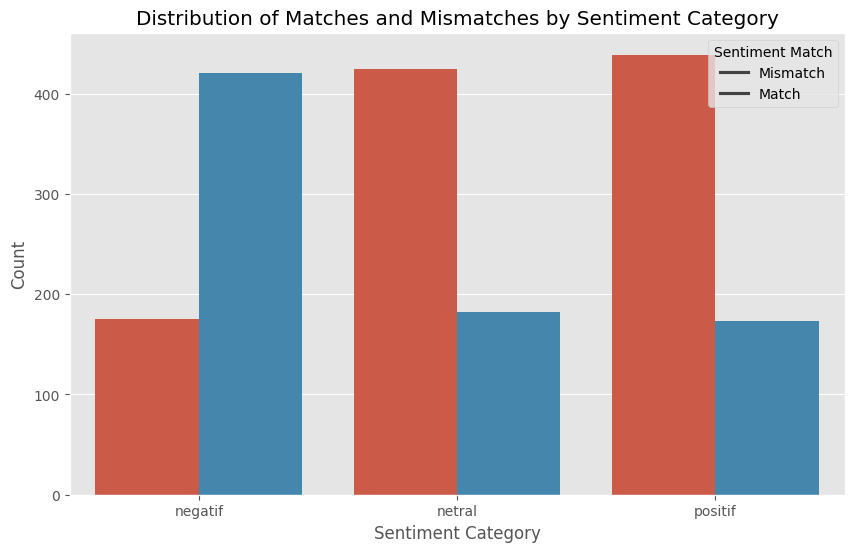

In [241]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=match_counts, x='sentimen', y='counts', hue='sentiment_match')
plt.title('Distribution of Matches and Mismatches by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Sentiment Match', loc='upper right', labels=['Mismatch', 'Match'])
plt.show()

In [242]:
df_polar = df_temp.drop(['sentimen', 'encoded_sentiment_value', 'sentiment_match'], axis=1)

In [243]:
df_polar.head()

,tweet,polarity_score,predicted_sentiment
0,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,netral
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",-3,negatif
2,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",2,positif
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,positif
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,negatif


In [244]:
# Map the values
df_polar['sentimen'] = df_polar['predicted_sentiment'].map(label_mapping)
df_polar = df_polar.drop(['predicted_sentiment'], axis=1)

In [245]:
df_polar.head()

,tweet,polarity_score,sentimen
0,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,1
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",-3,0
2,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",2,2
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,2
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,0


### Text Cleaning

In [246]:
import re

#### Remove emoji

In [247]:
emojis = pd.read_csv('./data/emojis.csv')
emojis = list(emojis['emoji'])
suff_emojis = list(set(map(lambda x:x[0],emojis)))

def remove_emoji(text):
  pattern = []
  for suff in suff_emojis:
    pattern.append(f'{suff}[\w\s]*')
  pattern = '|'.join(pattern)
  compile_pattern = re.compile(pattern)
  text = compile_pattern.sub(' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  res = re.sub(r'\s{2,}', ' ', text)
  return res

#### Remove regex related

In [248]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

def cleaning_pic_urls (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text

def remove_mentions(text):
    mention_pattern = re.compile(r'@[\W]*')
    return mention_pattern.sub(r' ',text)

def remove_hashtags(text):
    return text.replace(r'#', '')

def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    return ''.join(' ' if char in punctuations else char for char in text)

#### Case Folding & white spaces

In [249]:
def normalize_whitespace(text):
    return ' '.join(text.split())

def case_folding(text):
    return text.lower()

#### Wrapper Func

In [250]:
def clean_text(text):
    text = remove_urls(text)
    text = cleaning_pic_urls(text)
    text = remove_emoji(text)
    text = remove_hashtags(text)
    text = remove_mentions(text)
    text = remove_punctuation(text)
    text = normalize_whitespace(text)
    text = case_folding(text)
    return text

In [251]:
df_polar['tweet'] = df_polar['tweet'].apply(clean_text)

In [252]:
pd.set_option('display.max_colwidth', 250)
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung,0,1
1,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy,-3,0
2,di era jokowi ekonomi indonesia semakin baik,2,2
3,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai indonesia maju jokowi hebat,3,2
4,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak,-13,0
5,yg bisikin pak jokowi cm mikirin perputaran duit di golongan tertentu e sports hanya sebagian kecil dr sekian besar penentu pertumbuhan perekonomian indonesia bukan hal fundamental betul yg dikatakan prabowo walau dgn bhs yg sederhana tp mrpkan a...,-20,0
6,masa tenang msih ngoceh aja ttp jokowi harga mati,7,2
7,multilateral kita doakan di tps sambil dengarkan suara hati,1,2
8,iya bener aa kita mantap kan pilihan ke pemimpin yg bs memberi solusi jokowi bukan yg menyalahkan pemimpin sebelumnya sbyudhoyono dismash sm mas bowo percuma koalisi klau mengantam tmn koalisi yg plg penting pilih pemimpin yg rajin ibadah wajib b...,1,2
9,prabowo sandi sepakat tak ambil gaji karena negara sedang susah,-3,0


### Remove Stop words

In [253]:
import nltk
from nltk.corpus import stopwords
import requests
import random

nltk.download('stopwords')
nltk.download('punkt')

# URLs for stopwords
STOPWORDS_URLS = [
    "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt",
    "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
]

# Custom stopwords
CUSTOM_STOPWORDS = ['yang', 'untuk', 'pada', 'ke', 'dari', 'dan', 'dengan', 'oleh', 'bagi',
                    'serta', 'atau', 'tapi', 'karena', 'jadi', 'walaupun', 'meskipun', 'sehingga',
                    'agar', 'supaya', 'guna', 'demi', 'sebab', 'akibat', 'melainkan', 'sebaliknya',
                    'selain', 'kecuali', 'apalagi', 'asal', 'bila', 'kalau', 'jika', 'sementara', 'sewaktu',
                    'setelah', 'sebelum', 'lalu', 'kemudian', 'kini', 'sekarang', 'nanti', 'kembali', 'lagi',
                    'hanya', 'saja', 'pun', 'juga', 'malah', 'memang', 'tentu', 'sungguh', 'amat', 'sekali', 'apatah',
                    'mengapa', 'ialah', 'yaitu', 'yakni', 'begini', 'begitu', 'apakah', 'mengapa', 'siapa', 'mengapa', 'bagaimana',
                    'kapan', 'dimana', 'berapa', 'kemana', 'daripada', 'yg', 'itu.', 'ya', 'ga', 'dari', 'ke', 'pak', 'kan', 'nya', 'dgn',
                    'pas', 'tll', 'trsa', 'bang', 'smpai', 'ama', 'bikin', 'nih', 'pdahl', 'bangettt', 'btw', 'plg', 'ntar', 'skrg', 'ttg',
                    'tu', 'emg', 'ane', 'mnrt', 'tjoy', 'abis', 'bs', 'trjadi', 'kalo', 'guys', 'ma', 'aja', 'bgt', 'gua', 'sbnrnya', 'dr', 'sm', 'banget',
                    'sy', 'haha', 'aj', 'hrs', 'sllu', 'lanjut', 'utk', 'pdhl', 'ajaa', 'tp', 'kta', 'mas', 'tnx', 'udh', 'gwa', 'lol', 'bgtu', 'hemm', 'sih', 'bnyak', 'akan', 'si']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shabiras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shabiras/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [254]:
def shuffle_stopwords(stopwords):
    random.shuffle(stopwords)
    return stopwords

def get_nltk_stopwords():
    return set(stopwords.words('indonesian'))

def fetch_stopwords(url):
    response = requests.get(url)
    return set(response.text.split('\n'))

def get_custom_stopwords(custom_stopwords):
    return set(custom_stopwords)

def construct_stopwords(urls, custom_stopwords):
    stop_words = get_nltk_stopwords()
    for url in urls:
        stop_words.update(fetch_stopwords(url))
    stop_words.update(get_custom_stopwords(custom_stopwords))
    return stop_words

In [255]:
# Shuffle custom stopwords
shuffled_custom_stopwords = shuffle_stopwords(CUSTOM_STOPWORDS)

# Construct final stopwords set
stop_words = construct_stopwords(STOPWORDS_URLS, shuffled_custom_stopwords)

# Print to verify
print(f'Stopwords: {list(stop_words)[:15]}')

Stopwords: ['sepihak', 'siapa', 'terkait', 'olehnya', 'meski', 'terutama', 'kah', 'betulkah', 'pihaknya', 'terlalu', 'memperbuat', 'sejauh', 'bagi', 'melainkan', 'semata']


In [256]:
# remove stopwords
from nltk import word_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [257]:
df_polar['tweet'] = df_polar['tweet'].apply(remove_stopword)

In [258]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa rockygerung,0,1
1,batuan langka tasbih jokowi hadiah habib luthfi seharga mercy,-3,0
2,era jokowi ekonomi indonesia,2,2
3,sumatera asian games berdampak pd ekonomi diprediksi indonesia maju jokowi hebat,3,2
4,negara ngutang bngun infrastruktur dipake masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar negara dapet penghasilan penghasilan negara pajak,-13,0
5,bisikin jokowi cm mikirin perputaran duit golongan e sports penentu pertumbuhan perekonomian indonesia fundamental prabowo bhs sederhana mrpkan aspek fundamental ekonomi,-20,0
6,tenang msih ngoceh ttp jokowi harga mati,7,2
7,multilateral doakan tps dengarkan suara hati,1,2
8,bener aa mantap pilihan pemimpin solusi jokowi menyalahkan pemimpin sbyudhoyono dismash bowo koalisi klau mengantam tmn koalisi pilih pemimpin rajin ibadah wajib ngaji jumatan,1,2
9,prabowo sandi sepakat ambil gaji negara susah,-3,0


### Stemming and Lemmatization

In [259]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [260]:
df_polar['tweet'] = df_polar['tweet'].apply(stemming_and_lemmatization)

In [261]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,prabowo indonesia harga bangsa asing berita hoax buat kuasa rockygerung,0,1
1,batu langka tasbih jokowi hadiah habib luthfi harga mercy,-3,0
2,era jokowi ekonomi indonesia,2,2
3,sumatera asi games dampak pd ekonomi prediksi indonesia maju jokowi hebat,3,2
4,negara ngutang bngun infrastruktur dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar negara dapet hasil hasil negara pajak,-13,0
5,bisikin jokowi cm mikirin putar duit golong e sports tentu tumbuh ekonomi indonesia fundamental prabowo bhs sederhana mrpkan aspek fundamental ekonomi,-20,0
6,tenang msih ngoceh ttp jokowi harga mati,7,2
7,multilateral doa tps dengar suara hati,1,2
8,bener aa mantap pilih pimpin solusi jokowi salah pimpin sbyudhoyono dismash bowo koalisi klau mengantam tmn koalisi pilih pimpin rajin ibadah wajib ngaji jumat,1,2
9,prabowo sandi sepakat ambil gaji negara susah,-3,0


In [262]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [263]:
df_polar['tweet'] = df_polar['tweet'].apply(tokenize)

In [264]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,"[prabowo, indonesia, harga, bangsa, asing, berita, hoax, buat, kuasa, rockygerung]",0,1
1,"[batu, langka, tasbih, jokowi, hadiah, habib, luthfi, harga, mercy]",-3,0
2,"[era, jokowi, ekonomi, indonesia]",2,2
3,"[sumatera, asi, games, dampak, pd, ekonomi, prediksi, indonesia, maju, jokowi, hebat]",3,2
4,"[negara, ngutang, bngun, infrastruktur, dipake, masyarakat, masyarakat, ngeluh, negara, ngutang, negara, ngutang, utang, bayar, negara, dapet, hasil, hasil, negara, pajak]",-13,0
5,"[bisikin, jokowi, cm, mikirin, putar, duit, golong, e, sports, tentu, tumbuh, ekonomi, indonesia, fundamental, prabowo, bhs, sederhana, mrpkan, aspek, fundamental, ekonomi]",-20,0
6,"[tenang, msih, ngoceh, ttp, jokowi, harga, mati]",7,2
7,"[multilateral, doa, tps, dengar, suara, hati]",1,2
8,"[bener, aa, mantap, pilih, pimpin, solusi, jokowi, salah, pimpin, sbyudhoyono, dismash, bowo, koalisi, klau, mengantam, tmn, koalisi, pilih, pimpin, rajin, ibadah, wajib, ngaji, jumat]",1,2
9,"[prabowo, sandi, sepakat, ambil, gaji, negara, susah]",-3,0


In [275]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_FEATURES = 1000
MAX_LEN=50

# tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_polar['tweet'])
sequences = tokenizer.texts_to_sequences(df_polar['tweet'])

X = pad_sequences(sequences, padding='post', maxlen=MAX_LEN)

In [276]:
X.shape

(1815, 50)

In [277]:
y = df_polar['sentimen']

In [278]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_val = to_categorical(y_val, 3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1233, 50) (1233, 3)
(273, 50) (273, 3)


In [348]:
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential


vocab_size = 5000
embedding_size = 32
epochs=100
learning_rate = 0.05
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LEN))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.build()

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [349]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [358]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy',f1_m, precision_m, recall_m])

# Train model

batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/100
39/39 - 2s - 44ms/step - accuracy: 0.9968 - f1_m: 0.9968 - loss: 0.0050 - precision_m: 0.9968 - recall_m: 0.9968 - val_accuracy: 0.5696 - val_f1_m: 0.5778 - val_loss: 4.7492 - val_precision_m: 0.5778 - val_recall_m: 0.5778
Epoch 2/100
39/39 - 0s - 6ms/step - accuracy: 0.9968 - f1_m: 0.9972 - loss: 0.0055 - precision_m: 0.9976 - recall_m: 0.9968 - val_accuracy: 0.5696 - val_f1_m: 0.5778 - val_loss: 4.7578 - val_precision_m: 0.5778 - val_recall_m: 0.5778
Epoch 3/100
39/39 - 0s - 9ms/step - accuracy: 0.9984 - f1_m: 0.9984 - loss: 0.0046 - precision_m: 0.9984 - recall_m: 0.9984 - val_accuracy: 0.5663 - val_f1_m: 0.5747 - val_loss: 4.7593 - val_precision_m: 0.5747 - val_recall_m: 0.5747
Epoch 4/100
39/39 - 0s - 10ms/step - accuracy: 0.9959 - f1_m: 0.9960 - loss: 0.0068 - precision_m: 0.9960 - recall_m: 0.9960 - val_accuracy: 0.5663 - val_f1_m: 0.5747 - val_loss: 4.7475 - val_precision_m: 0.5747 - val_recall_m: 0.5747
Epoch 5/100
39/39 - 0s - 10ms/step - accuracy: 0.9984 - f1_m: 

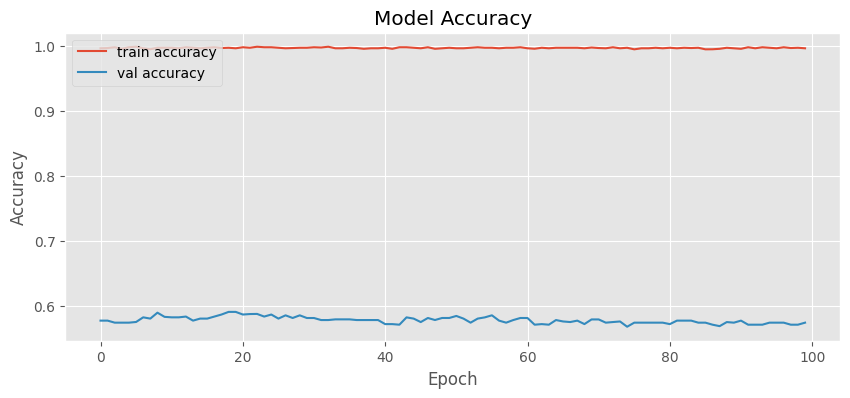

In [359]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['f1_m'], label = 'train accuracy')
ax.plot(history.history['val_f1_m'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [354]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = RMSprop, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = MAX_FEATURES, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy', f1_m, precision_m, recall_m])
    print(model.summary())
    return model

In [363]:
# If y_train and y_val are one-hot encoded, convert them to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_val_int = np.argmax(y_val, axis=1)
model2 = create_model()
batch_size = 64
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=2)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 3), output.shape=(None, 3)

NameError: name 'model_prediction' is not defined

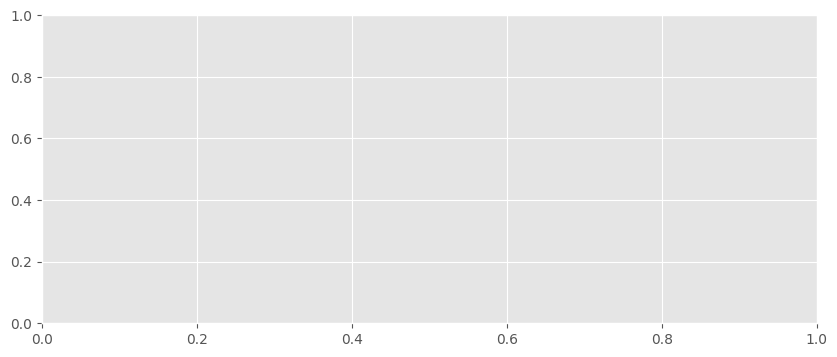

In [319]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history2.history['loss'], label = 'train loss')
ax.plot(history2.history['val_loss'], label = 'val loss')
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(loc = 'upper left')
plt.show()

In [347]:
import keras_tuner
from keras_tuner import BayesianOptimization

# Set up the tuner
tuner = BayesianOptimization(
    create_model,
    objective=keras_tuner.Objective("val_precission", direction="max"),  # or any other objective such as 'val_loss'
    max_trials=1000,
    directory='hyperparam_tuning',
    project_name='lstm_tuning'
)


Reloading Tuner from hyperparam_tuning/lstm_tuning/tuner0.json


In [341]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)

Trial 1 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s
